In [6]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv('amazon.csv', encoding='iso-8859-1', parse_dates=['date'])


In [10]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [11]:
# Display top 5 rows of the dataset
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [12]:
# Display Last 5 rows of dataset
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [16]:
# Find shape of our dataset
df.shape

(6454, 5)

In [17]:
print("Number of rows", df.shape[0])
print("Number of columns", df.shape[1])

Number of rows 6454
Number of columns 5


In [18]:
# Getting information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [19]:
# Check for duplicate data and drop them
dup_data = df.duplicated().any()

In [21]:
print("Are there any duplicated values in the data:", dup_data)

Are there any duplicated values in the data: True


In [22]:
df = df.drop_duplicates()

In [23]:
df.shape

(6422, 5)

In [24]:
6454-6422

32

In [26]:
# Check Null values in the dataset
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [28]:
# Get overall statistics about the dataframe
df.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Setembro,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


In [33]:
# Rename month name to english
df.head()


,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [43]:
df.loc[:, 'month_new'] = df['month'].map({'Janeiro':'jan', 
                                   'Fevereiro':'feb', 
                                   'Março':'march',
                                   'Abril':'april',
                                   'Maio':'may',
                                   'Junho':'jun',
                                   'Julho':'july',
                                   'Agosto':'august',
                                   'Setembro':'sep',
                                   'Outubro':'oct',
                                   'Novembro':'nov',
                                   'Dezembro':'dec'
                                  })

In [44]:
df.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


In [45]:
# Total number of fires registered
df.shape

(6422, 6)

In [47]:
# In which month maximum number of forest fires were reported
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [52]:
df1 = df.groupby('month_new')['number'].sum().reset_index()

In [53]:
df1

,month_new,number
0,april,28184.770
1,august,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,jun,55997.675
7,march,30709.405
8,may,34725.363
9,nov,85508.054


<Axes: xlabel='month_new', ylabel='number'>

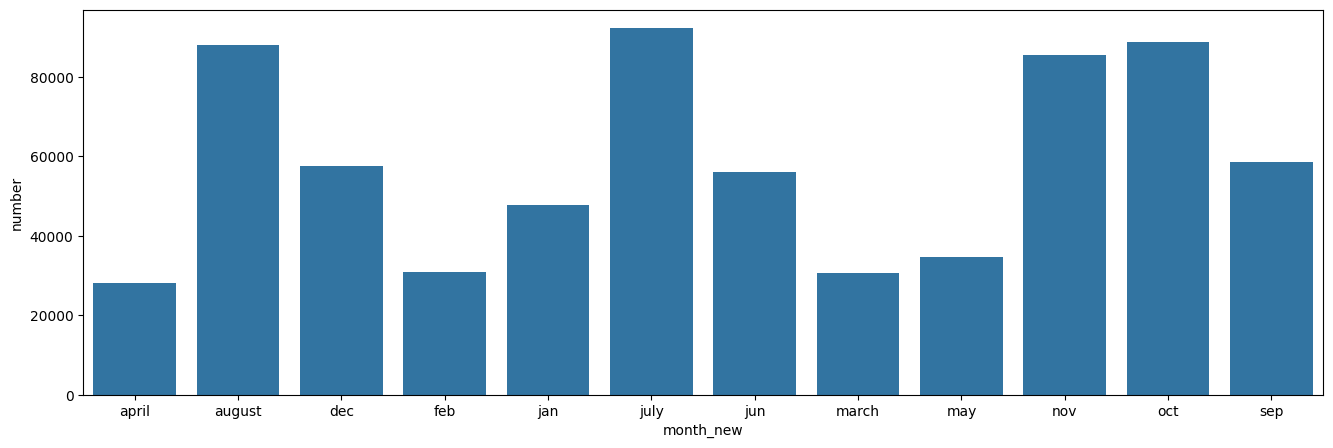

In [55]:
plt.figure(figsize=(16,5))
sns.barplot(x='month_new', y='number', data=df1)

In [56]:
# In which year maximum number of forest fires were reported
df2 = df.groupby('year')['number'].sum().reset_index()

In [57]:
df2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

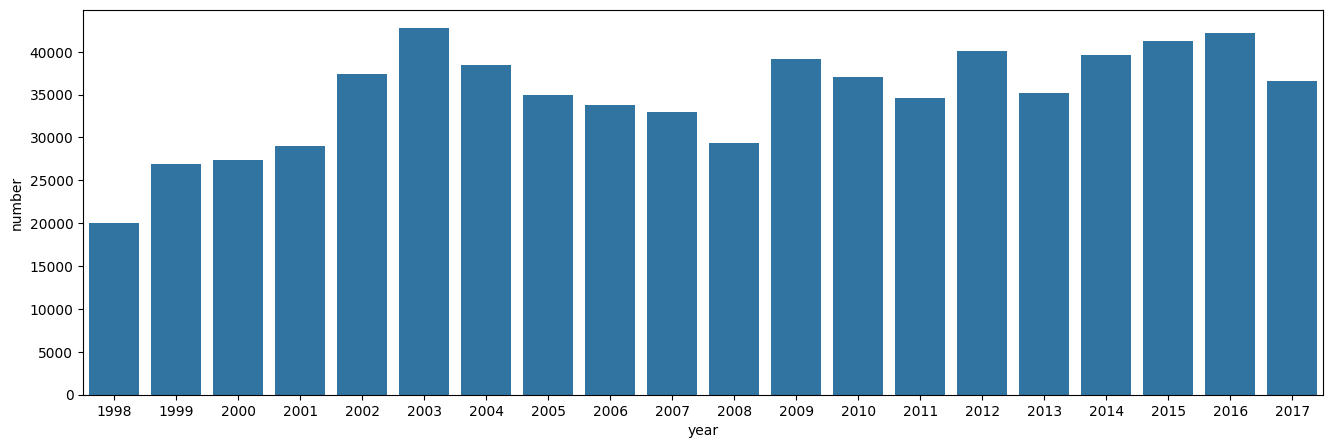

In [58]:
plt.figure(figsize=(16,5))
sns.barplot(x='year', y='number', data=df2)

In [59]:
# In Which state maximum number of forest fires were reported
df3 = df.groupby('state')['number'].sum().reset_index()

In [60]:
df3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


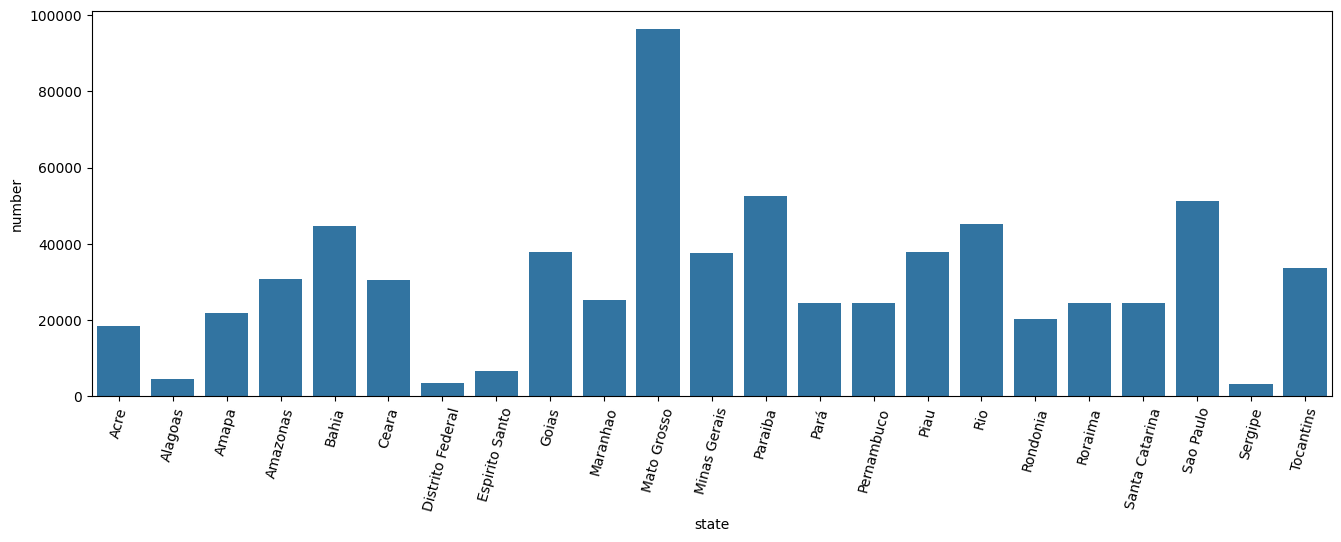

In [64]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=df3)
plt.xticks(rotation=75)
plt.show()

In [65]:
# Find total number of fires were reported in Amazonas
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [70]:
df[df['state'] =='Amazonas']['number'].sum()

np.float64(30650.129)

In [73]:
# Display number of fires were reported in Amazonas (year-wise)
df4 = df[df['state']=='Amazonas']

In [79]:
df5 = df4.groupby('year')['number'].sum().reset_index()

In [80]:
df5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

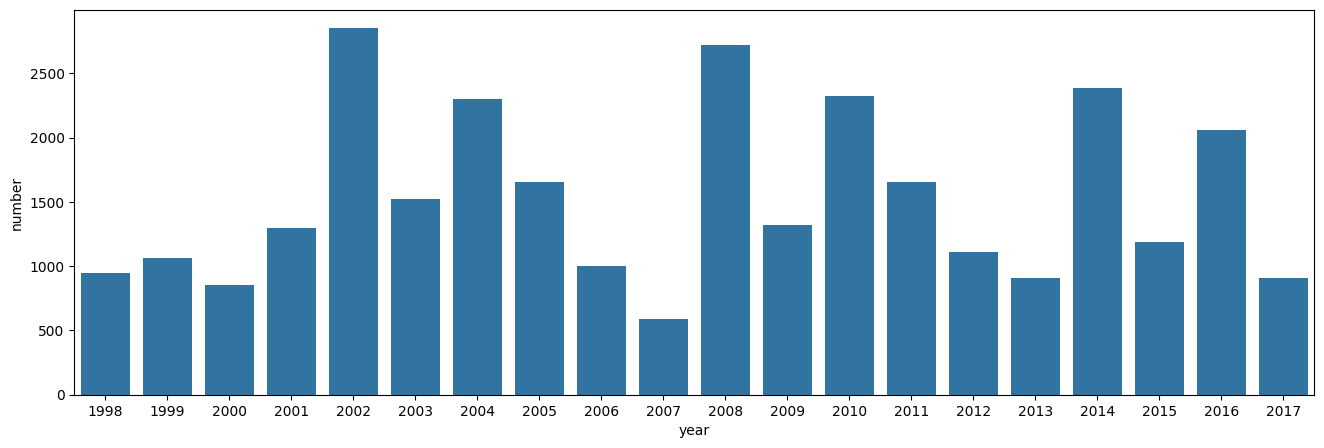

In [86]:
plt.figure(figsize=(16,5))
sns.barplot(x='year', y='number',data=df5)


In [87]:
# Display number of fires were reported in amazonas(Day wise)
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [88]:
df6 = df[df['state']=='Amazonas']

In [103]:
day = df6.groupby(df6['date'].dt.dayofweek)['number'].sum()

In [104]:
import calendar


In [105]:
day.index = [calendar.day_name[x] for x in range(0,7)]

In [108]:
day = day.reset_index()

In [109]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<Axes: xlabel='index', ylabel='number'>

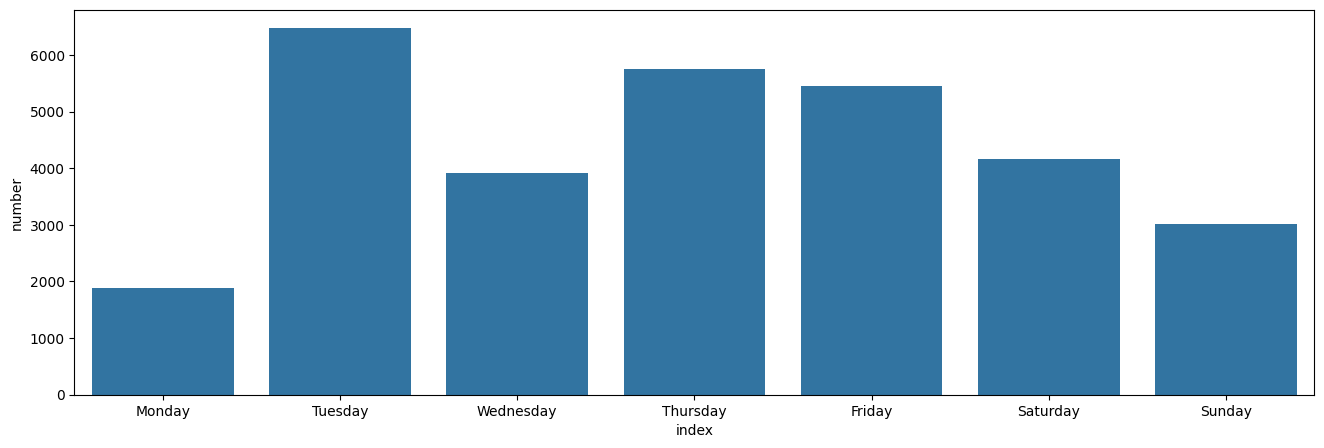

In [111]:
plt.figure(figsize=(16,5))
sns.barplot(x='index', y='number', data=day)

In [122]:
# Find the total number of fires were reported in 2015 and visualize data based on each month
fire = df[df['year']==2015].groupby('month_new')['number'].sum().reset_index()

In [123]:
fire

,month_new,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,jun,3260.552
7,march,2202.000
8,may,2384.000
9,nov,4034.518


<Axes: xlabel='month_new', ylabel='number'>

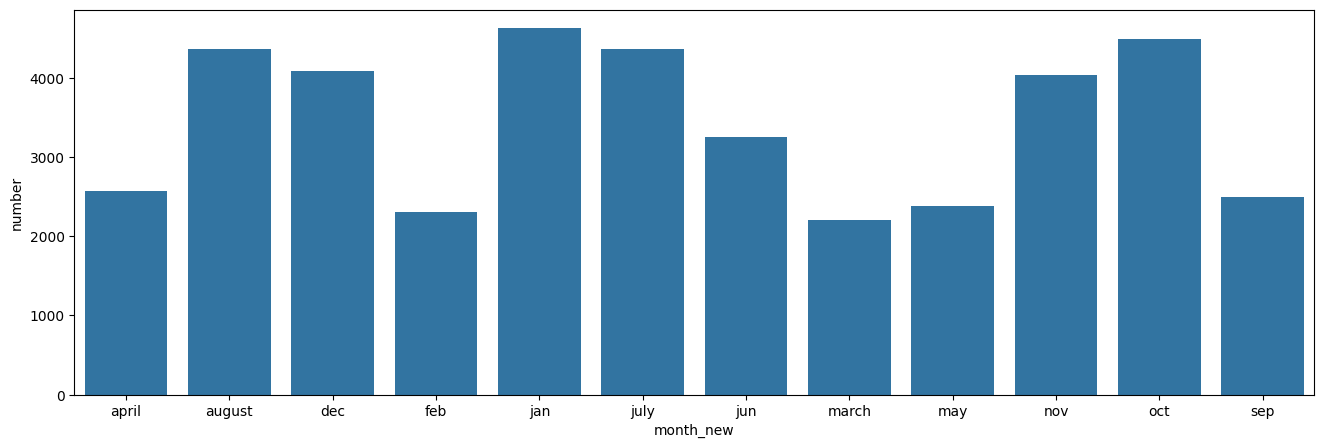

In [125]:
plt.figure(figsize=(16,5))
sns.barplot(x='month_new', y='number', data=fire)

In [135]:
# Find average number of fires were reported from highest to lowest(state-wise)
df8 = df.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

In [136]:
df8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


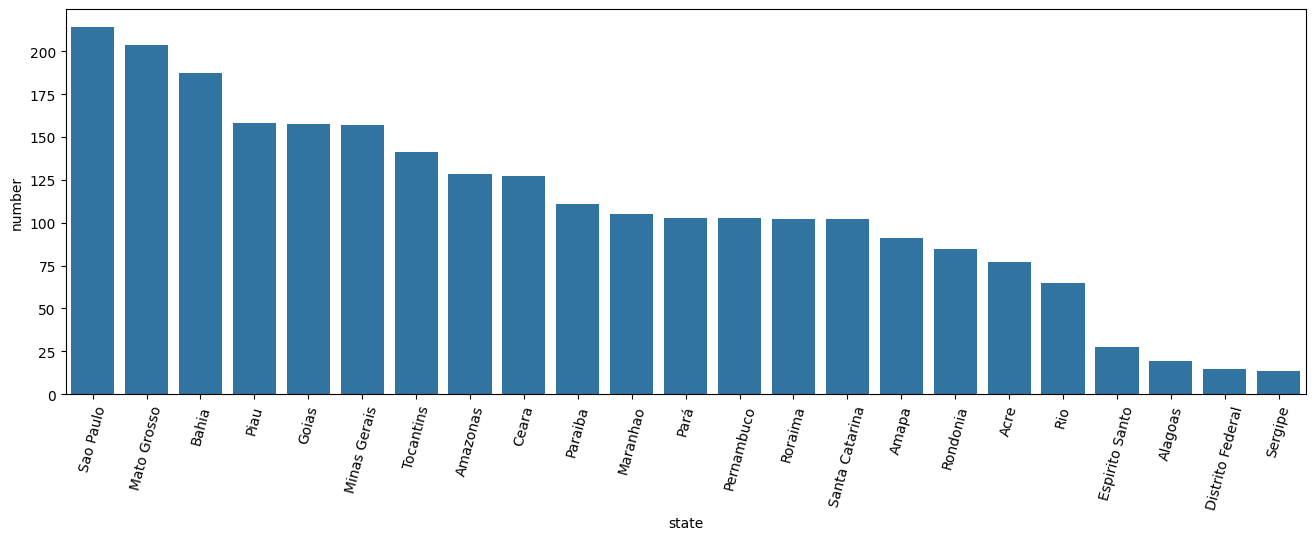

In [139]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=df8)
plt.xticks(rotation=75)
plt.show()

In [143]:
# To find the state names where fires were reported in 'dec' month
df[df['month_new'] =='dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)